*Using this dataset of article open-access prices paid by the WELLCOME Trust between 2012 and 2013, determine* - 

- the five most common journals and the total articles for each. 

- Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal. 

- For a real bonus round, identify the open access prices paid by subject area.

*Don't modify the data directly. Instead, write a cleaning script that will load the raw data and whip it into shape. Keep a record of your decisions: well-commented code is a must for recording your data cleaning decision-making progress. Submit a link to your script and results below and discuss it with your mentor at your next session.*

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WELLCOME_APCspend2013_forThinkful.csv', encoding='ISO-8859-1')
data

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [3]:
data.info()

#There are 199 null values in PMID/PMCID column (2127 - 1928 = 199), and 1 null value in the Journal title 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [4]:
data["Journal title"].value_counts().head(20)

PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
PLoS Neglected Tropical Diseases                   18
Human Molecular Genetics                           18
Nature Communications                              17
PLoS Genetics                                      15
PLoS Pathogens                                     15
Neuroimage                                         15
PLOS ONE                                           14
Brain                                              14
BMC Public Health                                  14
NeuroImage                                         14
Movement Disorders                                 13
Biochemical Journal                                12
Developmental Cell                                 12
Journal of Neuroscience     

To begin with, we see PLOS ONE to be one of the topmost journals, and it's spelled multiple ways. We need to clean the "Journal title" column. 

Let's see how many unique names we have for the "Journal title" column. 

In [5]:
## Cleaning the "Journal title" column
print("Unique values in the given dataset, prior to cleaning:")
print(len(data["Journal title"].unique()))
# there are 985 unique titles in the dataset


Unique values in the given dataset, prior to cleaning:
985


In [6]:
# Number of null values in the "Journal title" column. 
data.isnull().sum()

PMID/PMCID                                             199
Publisher                                                0
Journal title                                            1
Article title                                            0
COST (£) charged to Wellcome (inc VAT when charged)      0
dtype: int64

Removing one null value in the column. 

In [7]:
data["Journal title"] = data["Journal title"].dropna()

print("unique values AFTER dropna")
print(len(data["Journal title"].unique()))

unique values AFTER dropna
985


In [8]:
#make all Journal titles lowercase
data["Journal title"] = data["Journal title"].str.lower()

print("Unique values after lowercasing the journal titles")
print(len(data["Journal title"].unique()))

Unique values after lowercasing the journal titles
929


This is also evident as the number of PLOS ONE journals increasded to 190 from 92. 

In [9]:
data["Journal title"].value_counts().head(10)

plos one                                           190
journal of biological chemistry                     53
neuroimage                                          29
plos genetics                                       24
plos pathogens                                      24
nucleic acids research                              23
proceedings of the national academy of sciences     20
plos neglected tropical diseases                    20
nature communications                               19
human molecular genetics                            19
Name: Journal title, dtype: int64

In [10]:
#remove any white space before and after journal titles
data["Journal title"] = data["Journal title"].str.strip()
data["Journal title"].head()

0    psychological medicine
1         biomacromolecules
2                j med chem
3                j med chem
4                j org chem
Name: Journal title, dtype: object

In [11]:
print("unique values after removing white spaces")
print(len(data["Journal title"].unique()))

unique values after removing white spaces
895


That reduces the unique values to 895 from 929. 

In [12]:
#defining a function for removing common words 

def remove_common_words(series, text, rep_text):
    data[series] = data[series].str.replace(text, rep_text)
    return data[series]

In [13]:
remove_common_words("Journal title", "the journal of ", "")
print("Unique titles now: {}".format(len(data["Journal title"].unique())))

Unique titles now: 892


In [14]:
remove_common_words("Journal title", "journal of ", "")
print("Unique titles now: {}".format(len(data["Journal title"].unique())))

Unique titles now: 870


In [15]:
remove_common_words("Journal title", "jounral of", "")
print("Unique titles now: {}".format(len(data["Journal title"].unique())))

Unique titles now: 870


In [16]:
remove_common_words("Journal title", "j ", "")
print("Unique titles now: {}".format(len(data["Journal title"].unique())))

Unique titles now: 870


In [17]:
remove_common_words("Journal title", "the ", "")
print("Unique titles now: {}".format(len(data["Journal title"].unique())))

Unique titles now: 859


In [18]:
remove_common_words("Journal title", "chemical ", "chem")
remove_common_words("Journal title", "chemistry ", "chem")

print("Unique titles now: {}".format(len(data["Journal title"].unique())))

Unique titles now: 859


In [19]:
remove_common_words("Journal title", "physical ", "phys")
remove_common_words("Journal title", "physics ", "phys")

print("Unique titles now: {}".format(len(data["Journal title"].unique())))

Unique titles now: 859


In [20]:
remove_common_words("Journal title", "biology ", "bio")
remove_common_words("Journal title", "biol ", "bio")
remove_common_words("Journal title", "biological ", "bio")

print("Unique titles now: {}".format(len(data["Journal title"].unique())))

Unique titles now: 856


In [21]:
remove_common_words("Journal title", "proceedings ", "proc")
remove_common_words("Journal title", "international", "intl")
remove_common_words("Journal title", "nature", "nat")
remove_common_words("Journal title", "molecular", "mol")
remove_common_words("Journal title", "cellular", "cell")

print("Unique titles now: {}".format(len(data["Journal title"].unique())))

Unique titles now: 854


In [22]:
remove_common_words("Journal title", " 1", "one")
print("Unique titles now: {}".format(len(data["Journal title"].unique())))


Unique titles now: 853


In [23]:
#extreme cleaning by removing all white spaces and punctuations
#not useful anymore
data['Journal title'] = data['Journal title'].apply(lambda x: ''.join(list(filter(str.isalnum, str(x)))))

In [24]:
print("Unique titles now: {}".format(len(data["Journal title"].unique())))


Unique titles now: 841


We started with 985 unique journal titles. After cleaning up, we have 841 unique journal titles. 


In [29]:
print("Below are the five top common journals and articles in each:")
data["Journal title"].value_counts().head(5)

Below are the five top common journals and articles in each:


plosone                 207
biochemistry             63
neuroimage               29
nucleicacidsresearch     26
plosgenetics             24
Name: Journal title, dtype: int64

## Calculate the mean, median and the standard deviation of the cost per article for each journal

There are some typos in the "Cost" column, e.g., the \$ at the end whereas most of the costs are in pound. Ideally, I should convert the \$ to pound (multiple with .76 in the rows with \$), but I am leaving that right now. 



In [26]:
#renaming the column
data.rename(columns={'COST (£) charged to Wellcome (inc VAT when charged)': 'cost_in_pound'}, inplace=True)

In [27]:
#removing £ signs
data.cost_in_pound = data.cost_in_pound.str.replace("£", "")

#removing $ signs
data.cost_in_pound = data.cost_in_pound.str.replace("$", "")

In [115]:
plosone = data.loc[lambda df: df['Journal title']=='plosone', :]
biochem = data.loc[lambda df: df['Journal title']=='biochemistry', :]
neuro = data.loc[lambda df: df['Journal title']=='neuroimage', :]
nucle = data.loc[lambda df: df['Journal title']=='nucleicacidsresearch', :]
plosgen = data.loc[lambda df: df['Journal title']=='plosgenetics', :]

top_five = pd.concat([plosone, biolchem, neuro, nucle, plosgen], axis=0)


In [131]:
#"cost_in_pound" is not numeric and aggregate is encountering DataError: No numeric types to aggregate, 
#changing to numeric type

top_five["cost_in_pound"] = top_five['cost_in_pound'].astype(float)

In [163]:
#creating a new dataframe for reporting the stats. #to_frame converts to a DF

top_five_stats = top_five.groupby("Journal title")["cost_in_pound"].mean().to_frame()
top_five_stats["median"] = top_five.groupby("Journal title")["cost_in_pound"].median().to_frame() 
top_five_stats["stdev"] = top_five.groupby("Journal title")["cost_in_pound"].std()

In [164]:
#renaming the column "cost_in_pound" to "mean"
top_five_stats.rename(columns={"cost_in_pound" : "mean"})

,mean,median,stdev
Journal title,,,
biochemistry,17245.747619,1314.53,125812.904953
neuroimage,2215.168276,2326.43,266.653947
nucleicacidsresearch,1149.000000,852.00,442.940447
plosgenetics,84839.435000,1718.39,281865.707794
plosone,40472.287246,899.34,193313.084568


The mean and standard deviation are high in some articles. That is because some of the articles are priced much higher than the others. 

In [178]:
top_five.cost_in_pound.describe()

count       349.000000
mean      33222.079885
std      174958.539260
min         122.310000
25%         870.130000
50%        1040.210000
75%        1556.610000
max      999999.000000
Name: cost_in_pound, dtype: float64

Text(0.5,1,'Distribution of costs')

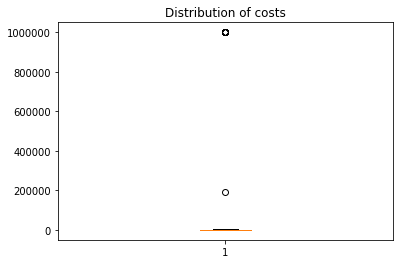

In [179]:
plt.boxplot(top_five["cost_in_pound"])
plt.title("Distribution of costs")

From the boxplot it is apparent that there are outliers. We'll trim these down. 

In [197]:
trim_cost = top_five[top_five["cost_in_pound"] < 200000.0]
trim_cost.describe()

,cost_in_pound
count,338.000000
mean,1758.925680
std,10424.316709
min,122.310000
25%,867.405000
50%,1031.340000
75%,1456.190000
max,192645.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1125d19e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1125c52e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1125d1898>],
 'medians': [<matplotlib.lines.Line2D at 0x1125c5b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1125c5f60>],
 'means': []}

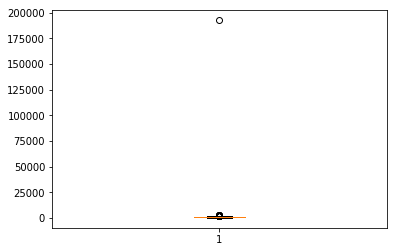

In [198]:
plt.boxplot(trim_cost.cost_in_pound)

Looks like there are more outliers. Trimming it further. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 1282 to 1385
Data columns (total 5 columns):
PMID/PMCID       324 non-null object
Publisher        337 non-null object
Journal title    337 non-null object
Article title    337 non-null object
cost_in_pound    337 non-null float64
dtypes: float64(1), object(4)
memory usage: 15.8+ KB


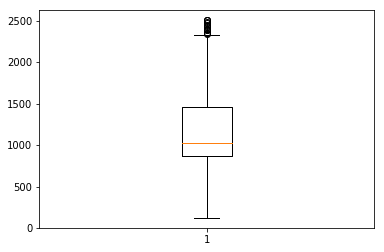

In [201]:
trim_cost = top_five[top_five["cost_in_pound"] < 175000.0]
trim_cost.info()
plt.boxplot(trim_cost.cost_in_pound)
plt.show()

In [213]:
#selecting a subset of the dataframe with costs less than 175000 pounds
trimmed_top_five = top_five[top_five["cost_in_pound"] < 175000.0]

In [222]:
trimmed_top_five.head(5)

,PMID/PMCID,Publisher,Journal title,Article title,cost_in_pound
1282,3517619,PLoS,plosone,HCN1 and HCN2 in Rat DRG Neurons: Levels in No...,1001.03
1283,3498109,PLoS,plosone,Fetal alcohol exposure and IQ at age 8: Eviden...,1004.15
1284,3515553,PLoS,plosone,Vitamin B-12 status during pregnancy and child...,1011.45
1285,3522679,PLoS,plosone,Validation of Dual Energy X-ray Absorptiometry...,1011.45
1286,3485223,PLoS,plosone,Associations of different phenotypes of wheezi...,1015.73


In [235]:
#recalculating stats again for a better estimate
trimmed_top_five_statss = trimmed_top_five.groupby("Journal title")["cost_in_pound"].mean().to_frame()

In [239]:
trimmed_top_five_statss["median"] = trimmed_top_five.groupby("Journal title")["cost_in_pound"].median().to_frame()
trimmed_top_five_statss["stdev"] = trimmed_top_five.groupby("Journal title")["cost_in_pound"].std().to_frame()
trimmed_top_five_statss.rename(columns={"cost_in_pound": "mean"}, inplace=True)

In [240]:
trimmed_top_five_statss

,mean,median,stdev
Journal title,,,
biochemistry,1394.888710,1313.130,395.860841
neuroimage,2215.168276,2326.430,266.653947
nucleicacidsresearch,1149.000000,852.000,442.940447
plosgenetics,1643.110909,1712.730,153.366825
plosone,934.982121,896.975,194.966229


### Challenge: Article Price by Subject area?

Identify the open access prices paid by subject area.

In [259]:
bio_df = data[data["Journal title"].str.contains("bio")]["cost_in_pound"].astype(float).mean()
chem_df = data[data["Journal title"].str.contains("chem")]["cost_in_pound"].astype(float).mean()
phys_df = data[data["Journal title"].str.contains("phys")]["cost_in_pound"].astype(float).mean()

In [261]:
print("Average cost of biological articles are £{}".format(bio_df))
print("Average cost of chemical articles are £{}".format(chem_df))
print("Average cost of physical sciences articles are £{}".format(phys_df))

Average cost of biological articles are £10816.59641566265
Average cost of chemical articles are £18540.583389830506
Average cost of physical sciences articles are £29333.96305555556
